# Quickstart in 5 minutes

In order to run your first Deepchecks Suite all you need to have is the data and model that you wish to validate. More specifically, you need:

- DataFrames with your train and test data
- (optional) A model that supports the scikit-learn API. Required for running checks that need the model's predictions for running.

To run your first suite you only need 6 lines of code, that start here: [Define a Dataset Object](#Define-a-Dataset-Object).

## Load Data, Split Train-Val, and Train a Simple Model

For the purpose of this guide we'll use the simple iris dataset and train a simple random forest model for multiclass classification:

In [1]:
# General imports
import pandas as pd
import numpy as np
np.random.seed(22)

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load Data
iris_df = load_iris(return_X_y=False, as_frame=True)['frame']
label_col = 'target'
df_train, df_test = train_test_split(iris_df, stratify=iris_df[label_col], random_state=0)

# Train Model
rf_clf = RandomForestClassifier()
rf_clf.fit(df_train.drop(label_col, axis=1), df_train[label_col]);

## Define a Dataset Object

Initialize the Dataset object, stating the relevant metadata about the dataset (e.g. the name for the label column) <br>
Check out the Dataset's attributes to see which additional special columns can be declared and used (e.g. date column, index column).

In [2]:
from deepchecks import Dataset

# We explicitly state that this dataset has no categorical features, otherwise they will be automatically inferred
# If the dataset has categorical features, the best practice is to pass a list with their names

ds_train = Dataset(df_train, label=label_col, cat_features=[])
ds_test =  Dataset(df_test,  label=label_col, cat_features=[])

## Run Overall Check Suite

Use the overall suite that is a collection of (most of) the prebuilt checks:

In [3]:
from deepchecks.suites import full_suite

suite = full_suite()

Full Suite 
 The suite is composed of various checks such as: Special Characters, Model Inference Time Check, Index Train Test Leakage, etc... 
 Each check may contain conditions (which results in 
 ✓ /
 ✖ /
 ! 
 ),
 as well as other outputs such as plots or tables. 
 Suites, checks and conditions can all be modified (see tutorial [link]). 
 Conditions Summary

Status 
 Check 
 Condition 
 More Info 
 
 
 
 
 ✖ 
 Performance Report 
 Train-Test scores relative degradation is not greater than 0.1 
 Precision (Default) for class 1 (train=1 test=0.87) Recall (Default) for class 2 (train=1 test=0.83) 
 
 
 ✖ 
 Single Feature Contribution Train-Test 
 Train features' Predictive Power Score (PPS) is not greater than 0.7 
 Features in train dataset with PPS above threshold: petal width (cm), petal length (cm) 
 
 
 ! 
 Model Error Analysis 
 The performance of the detected segments must not differ by more than 5.00% 
 Change in Accuracy (Default) in features: petal length (cm), petal width (cm) exceeds threshold. 
 
 
 ✓ 
 ROC Report - Test Dataset 
 Not less than 0.7 AUC score for all the classes 
 
 
 
 ✓ 
 ROC Report - Train Dataset 
 Not less than 0.7 AUC score for all the classes 
 
 
 
 ✓ 
 Single Feature Contribution Train-Test 
 Train-Test features' Predictive Power Score (PPS) difference is not greater than 0.2 
 
 
 
 ✓ 
 Datasets Size Comparison 
 Test-Train size ratio is not smaller than 0.01 
 
 
 
 ✓ 
 Whole Dataset Drift 
 Drift value is not greater than 0.25 
 
 
 
 ✓ 
 Train Test Label Drift 
 PSI and Earth Mover's Distance for label drift cannot be greater than 0.2 or 0.1 respectively 
 
 
 
 ✓ 
 Train Test Samples Mix 
 Percentage of test data samples that appear in train data not greater than 10.00% 
 
 
 
 ✓ 
 Model Inference Time Check - Test Dataset 
 Average model inference time for one sample is not greater than 0.001 
 
 
 
 ✓ 
 Model Inference Time Check - Train Dataset 
 Average model inference time for one sample is not greater than 0.001 
 
 
 
 ✓ 
 Unused Features 
 Number of high variance unused features is not greater than 5 
 
 
 
 ✓ 
 Simple Model Comparison 
 $$\frac{\text{model score}}{\text{simple model score}} >= 1.1$$ 
 
 
 
 ✓ 
 Train Test Drift 
 PSI and Earth Mover's Distance cannot be greater than 0.2 and 0.1 respectively 
 
 
 
 ✓ 
 Special Characters - Test Dataset 
 Ratio of entirely special character samples not greater than 0.10% for all columns 
 
 
 
 ✓ 
 Special Characters - Train Dataset 
 Ratio of entirely special character samples not greater than 0.10% for all columns 
 
 
 
 ✓ 
 String Length Out Of Bounds - Test Dataset 
 Ratio of outliers not greater than 0% string length outliers for all columns 
 
 
 
 ✓ 
 String Length Out Of Bounds - Train Dataset 
 Ratio of outliers not greater than 0% string length outliers for all columns 
 
 
 
 ✓ 
 Data Duplicates - Test Dataset 
 Duplicate data is not greater than 0% 
 
 
 
 ✓ 
 Data Duplicates - Train Dataset 
 Duplicate data is not greater than 0% 
 
 
 
 ✓ 
 String Mismatch - Test Dataset 
 No string variants for all columns 
 
 
 
 ✓ 
 String Mismatch - Train Dataset 
 No string variants for all columns 
 
 
 
 ✓ 
 Mixed Data Types - Test Dataset 
 Rare data types in all columns are either more than 10.00% or less than 1.00% of the data 
 
 
 
 ✓ 
 Mixed Nulls - Test Dataset 
 Not more than 1 different null types for all columns 
 
 
 
 ✓ 
 Mixed Nulls - Train Dataset 
 Not more than 1 different null types for all columns 
 
 
 
 ✓ 
 Single Value in Column - Test Dataset 
 Does not contain only a single value for all columns 
 
 
 
 ✓ 
 Single Value in Column - Train Dataset 
 Does not contain only a single value for all columns 
 
 
 
 ✓ 
 Label Ambiguity - Train Dataset 
 Ambiguous sample ratio is not greater than 0% 
 
 
 
 ✓ 
 String Mismatch Comparison 
 No new variants allowed in test data for all columns 
 
 
 
 ✓ 
 New Label Train Test 
 Number of new label values is not greater than 0 
 
 
 
 ✓ 
 Category Mismatch Train Test 
 Ratio of samples with a new category is not greater than 0% for all columns 
 
 
 
 ✓ 
 Dominant Frequency Change 
 Change in ratio of dominant value in data not more than 25.00% 
 
 
 
 ✓ 
 Mixed Data Types - Train Dataset 
 Rare data types in all columns are either more than 10.00% or less than 1.00% of the data 
 
 
 
 ✓ 
 Label Ambiguity - Test Datas

Additional Outputs

Performance Report

Summarize given scores on a dataset and model.

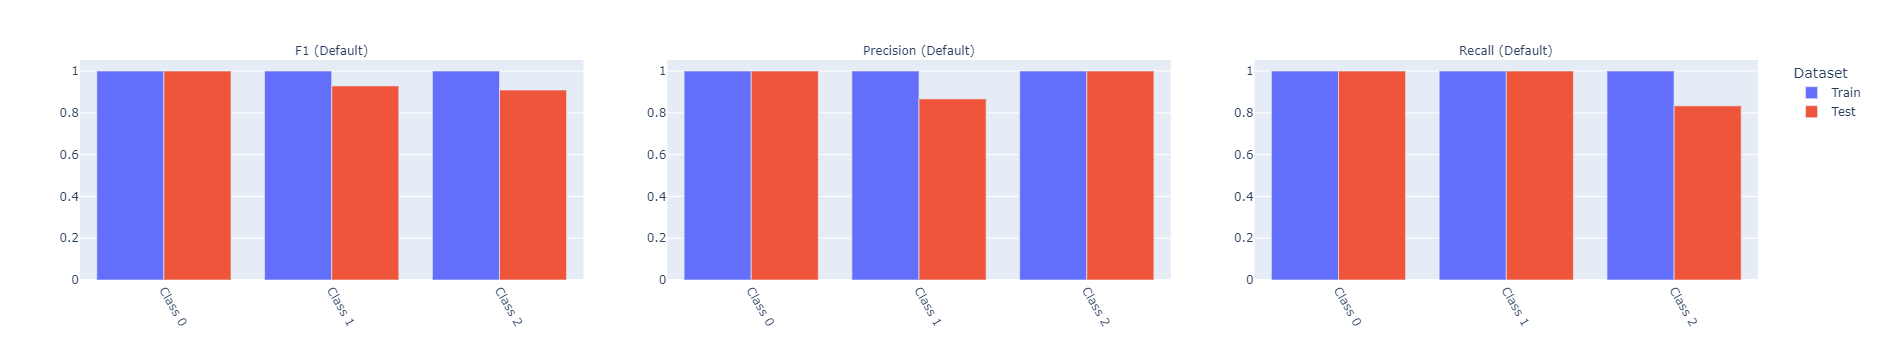

Go to top

Single Feature Contribution Train-Test

Return the Predictive Power Score of all features, in order to estimate each feature's ability to predict the label.

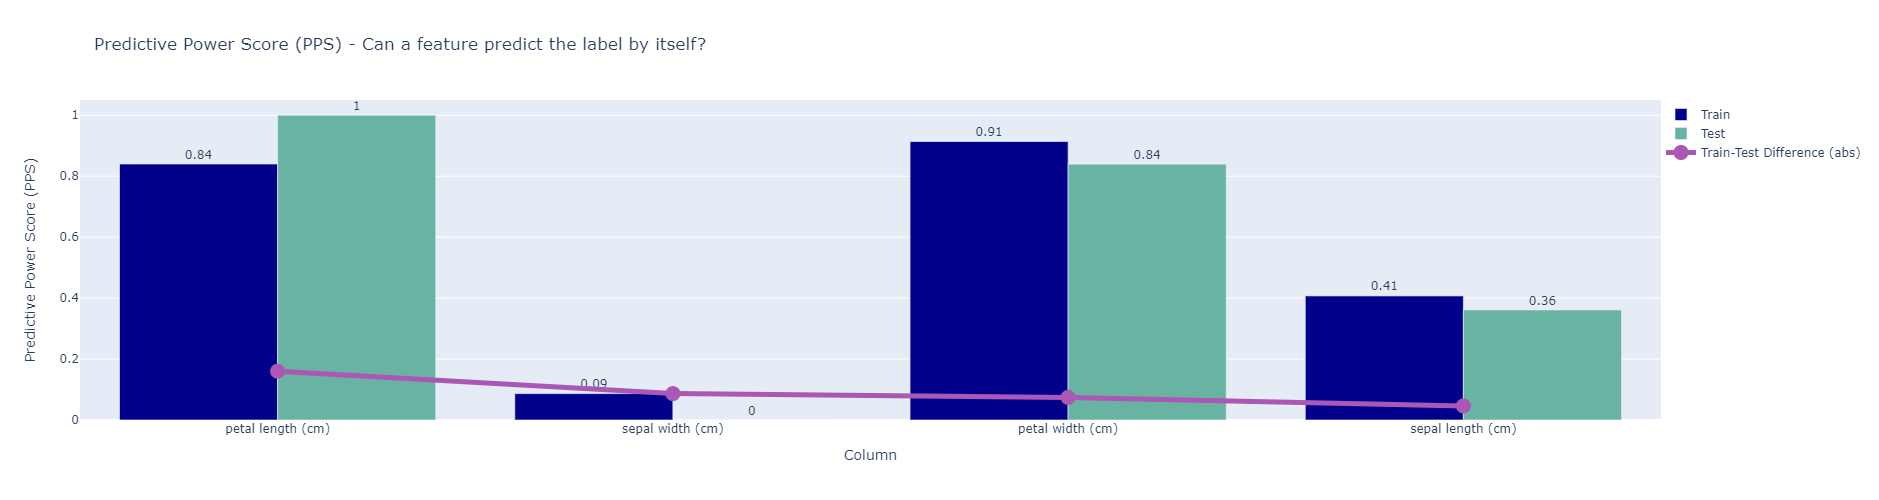

The PPS ( Predictive Power Score ) is used to estimate the ability of a feature to predict the label by itself.

In the graph above , we should suspect we have problems in our data if:

1. Train dataset PPS values are high :

Can indicate that this feature's success in predicting the label is actually due to data leakage,

meaning that the feature holds information that is based on the label to begin with.

2. Large difference between train and test PPS (train PPS is larger):

An even more powerful indication of data leakage, as a feature that was powerful in train but not in test

can be explained by leakage in train that is not relevant to a new dataset.

3. Large difference between test and train PPS (test PPS is larger):

An anomalous value, could indicate drift in test dataset that caused a coincidental correlation to the target label.

Go to top

Model Error Analysis

Find features that best split the data into segments of high and low model error.

The following graphs show the distribution of error for top features that are most useful for distinguishing
 high error samples from low error samples.

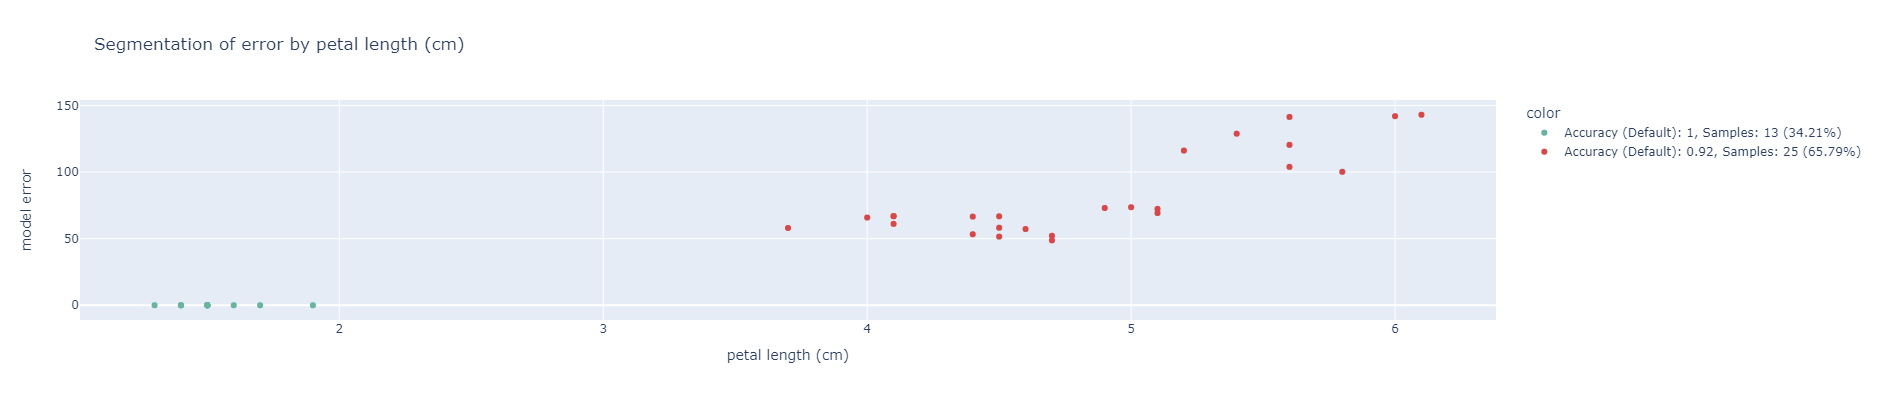

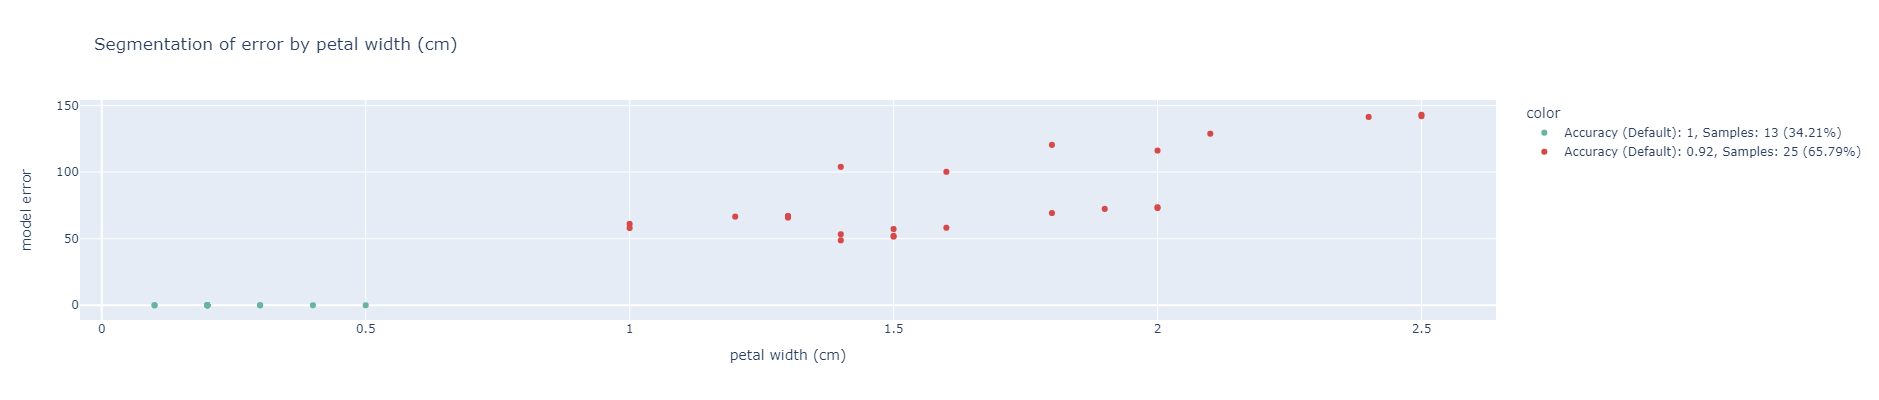

Go to top

Model Info

Summarize given model parameters.

Model Type: RandomForestClassifier

Parameter 
 Value 
 Default 
 
 
 
 
 bootstrap 
 True 
 True 
 
 
 ccp_alpha 
 0.00 
 0.00 
 
 
 class_weight 
 None 
 None 
 
 
 criterion 
 gini 
 gini 
 
 
 max_depth 
 None 
 None 
 
 
 max_features 
 auto 
 auto 
 
 
 max_leaf_nodes 
 None 
 None 
 
 
 max_samples 
 None 
 None 
 
 
 min_impurity_decrease 
 0.00 
 0.00 
 
 
 min_samples_leaf 
 1 
 1 
 
 
 min_samples_split 
 2 
 2 
 
 
 min_weight_fraction_leaf 
 0.00 
 0.00 
 
 
 n_estimators 
 100 
 100 
 
 
 n_jobs 
 None 
 None 
 
 
 oob_score 
 False 
 False 
 
 
 random_state 
 None 
 None 
 
 
 verbose 
 0 
 0 
 
 
 warm_start 
 False 
 False

Colored rows are parameters with non-default values

Go to top

Columns Info - Train Dataset

Return the role and logical type of each column.

* showing only the top 10 columns, you can change it using n_top_columns param

target 
 petal width (cm) 
 petal length (cm) 
 sepal length (cm) 
 sepal width (cm) 
 
 
 
 
 role 
 label 
 numerical feature 
 numerical feature 
 numerical feature 
 numerical feature

Go to top

Columns Info - Test Dataset

Return the role and logical type of each column.

* showing only the top 10 columns, you can change it using n_top_columns param

target 
 petal width (cm) 
 petal length (cm) 
 sepal length (cm) 
 sepal width (cm) 
 
 
 
 
 role 
 label 
 numerical feature 
 numerical feature 
 numerical feature 
 numerical feature

Go to top

Confusion Matrix Report - Train Dataset

Calculate the confusion matrix of the model on the given dataset.

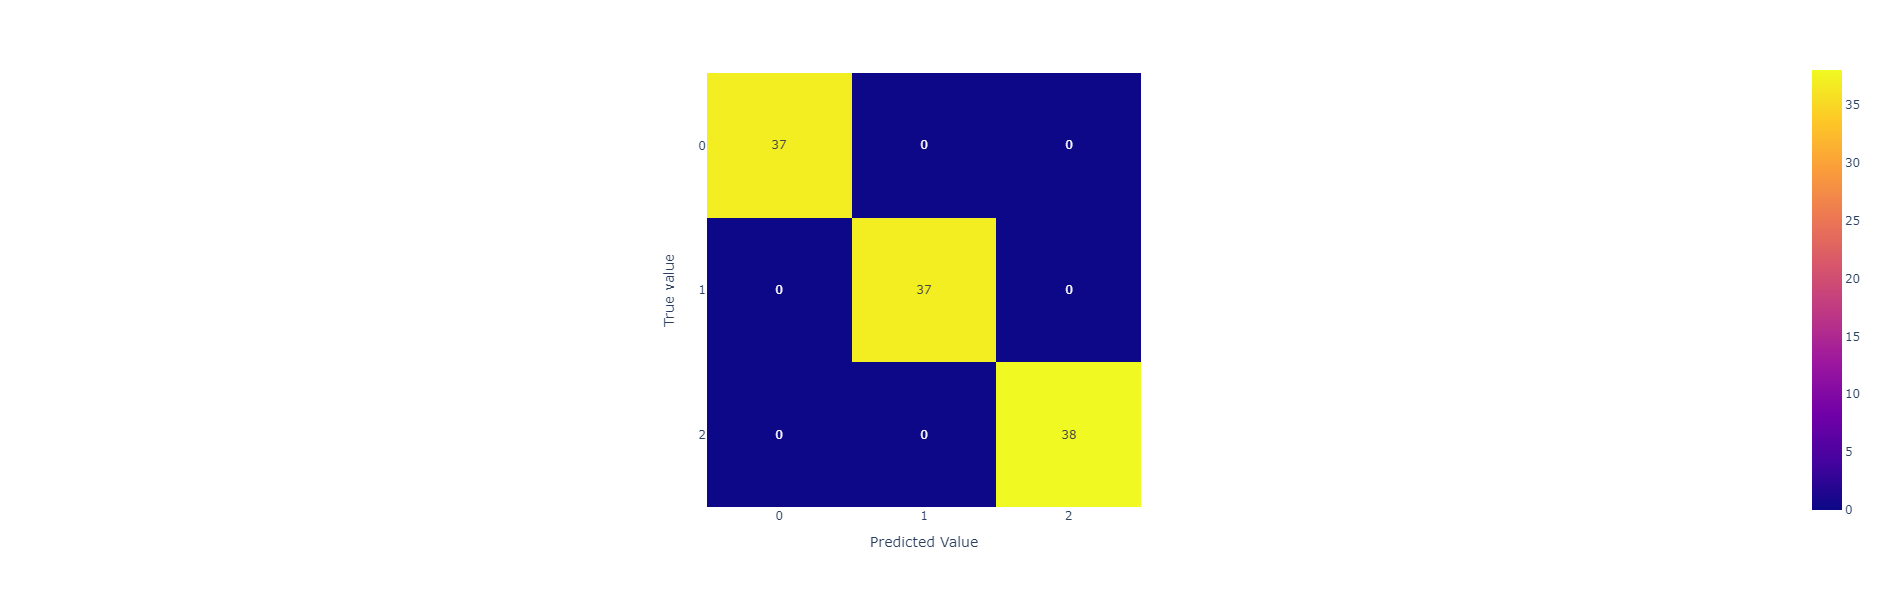

Go to top

Confusion Matrix Report - Test Dataset

Calculate the confusion matrix of the model on the given dataset.

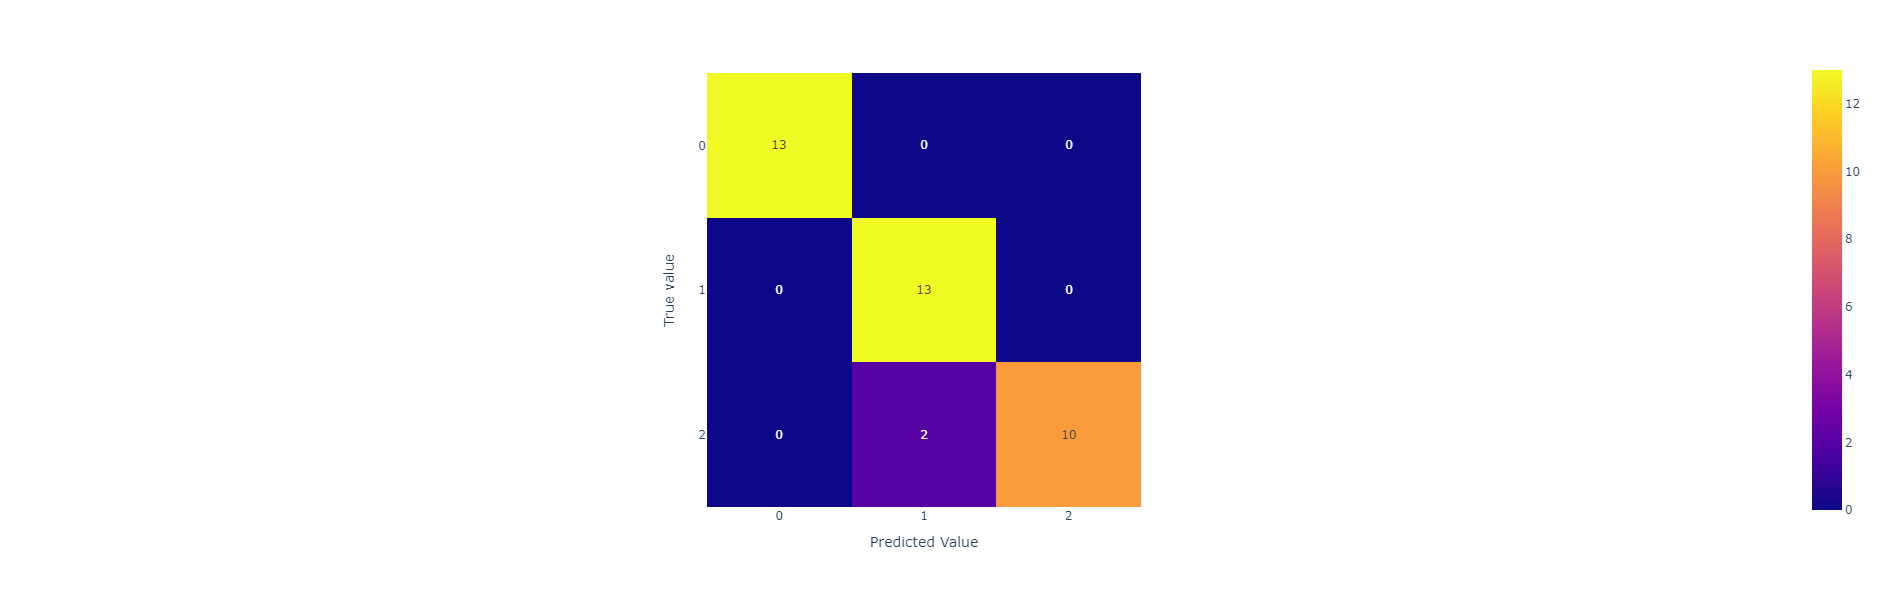

Go to top

ROC Report - Train Dataset

Calculate the AUC (Area Under Curve) for each class.

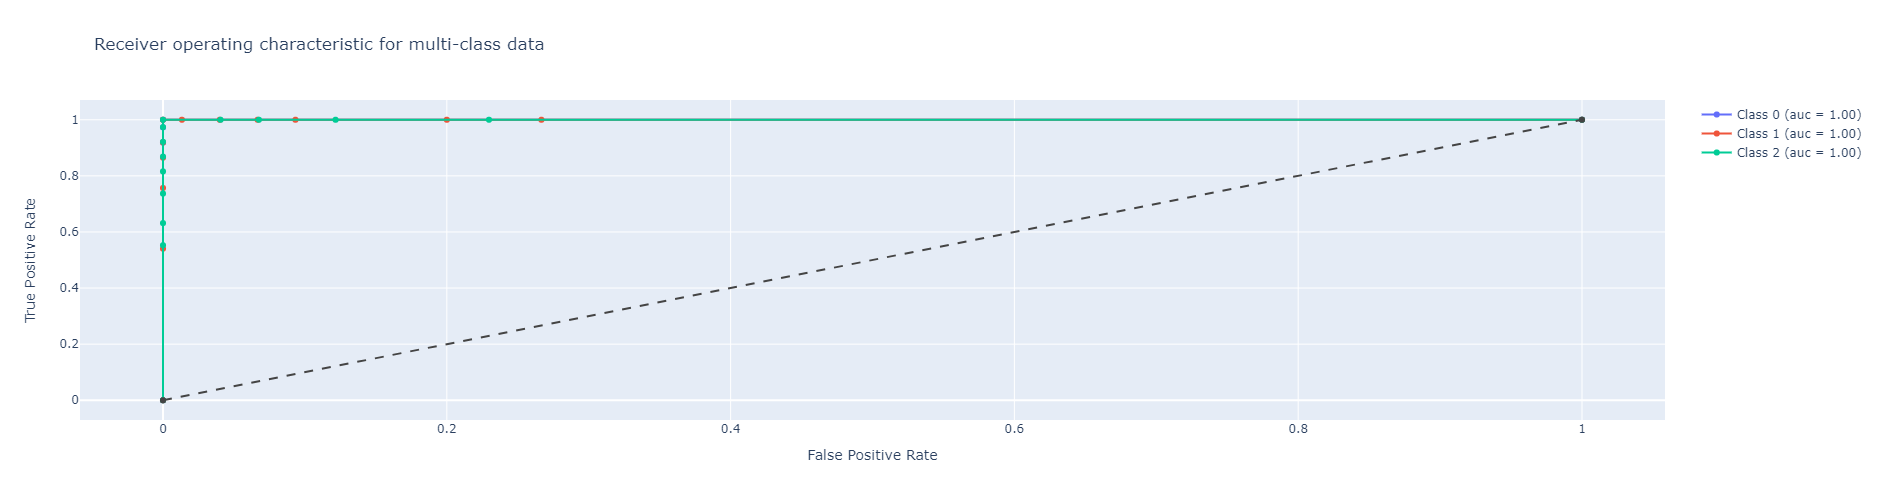

Go to top

ROC Report - Test Dataset

Calculate the AUC (Area Under Curve) for each class.

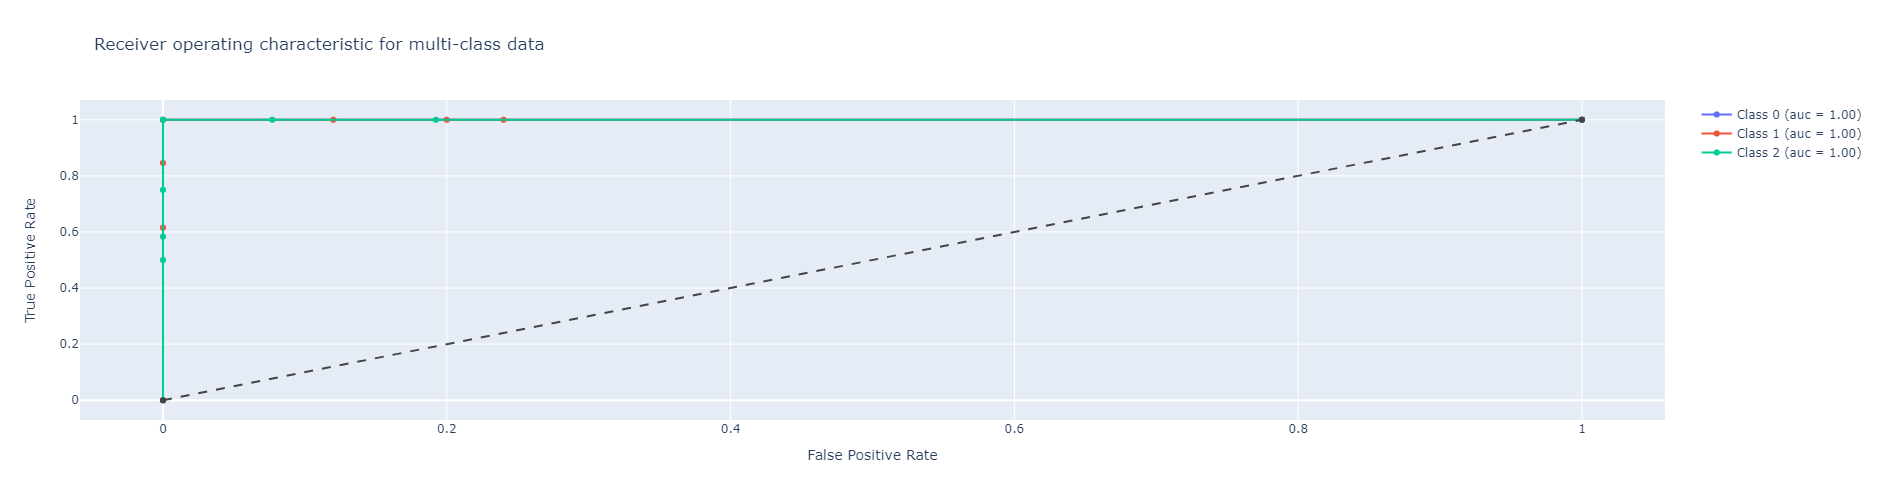

Go to top

Simple Model Comparison

Compare given model score to simple model score (according to given model type).

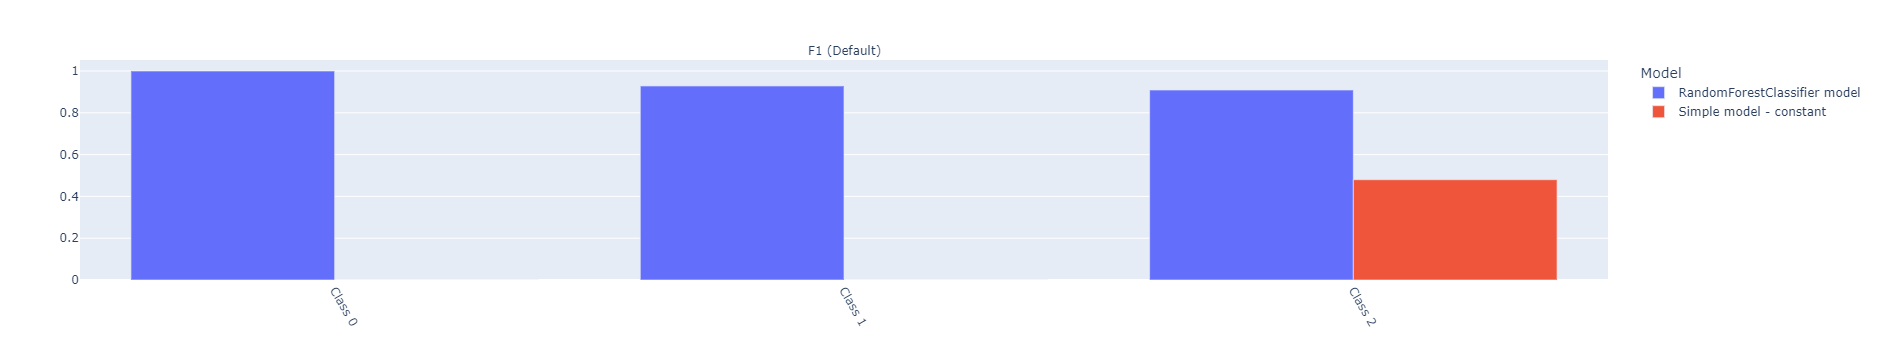

Go to top

Calibration Metric - Train Dataset

Calculate the calibration curve with brier score for each class.

Calibration curves (also known as reliability diagrams) compare how well the probabilistic predictions of a binary classifier are calibrated. It plots the true frequency of the positive label against its predicted probability, for binned predictions.

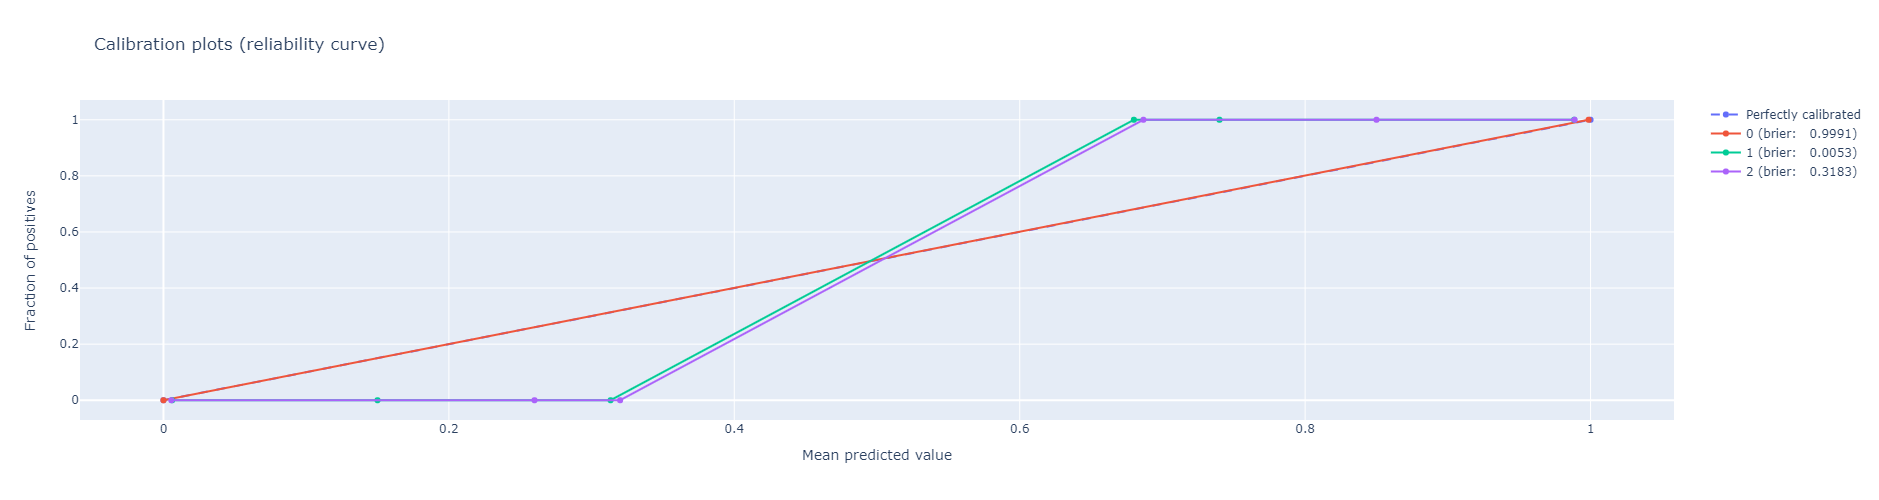

The Brier score metric may be used to assess how well a classifier is calibrated. For more info, please visit https://en.wikipedia.org/wiki/Brier_score

Go to top

Calibration Metric - Test Dataset

Calculate the calibration curve with brier score for each class.

Calibration curves (also known as reliability diagrams) compare how well the probabilistic predictions of a binary classifier are calibrated. It plots the true frequency of the positive label against its predicted probability, for binned predictions.

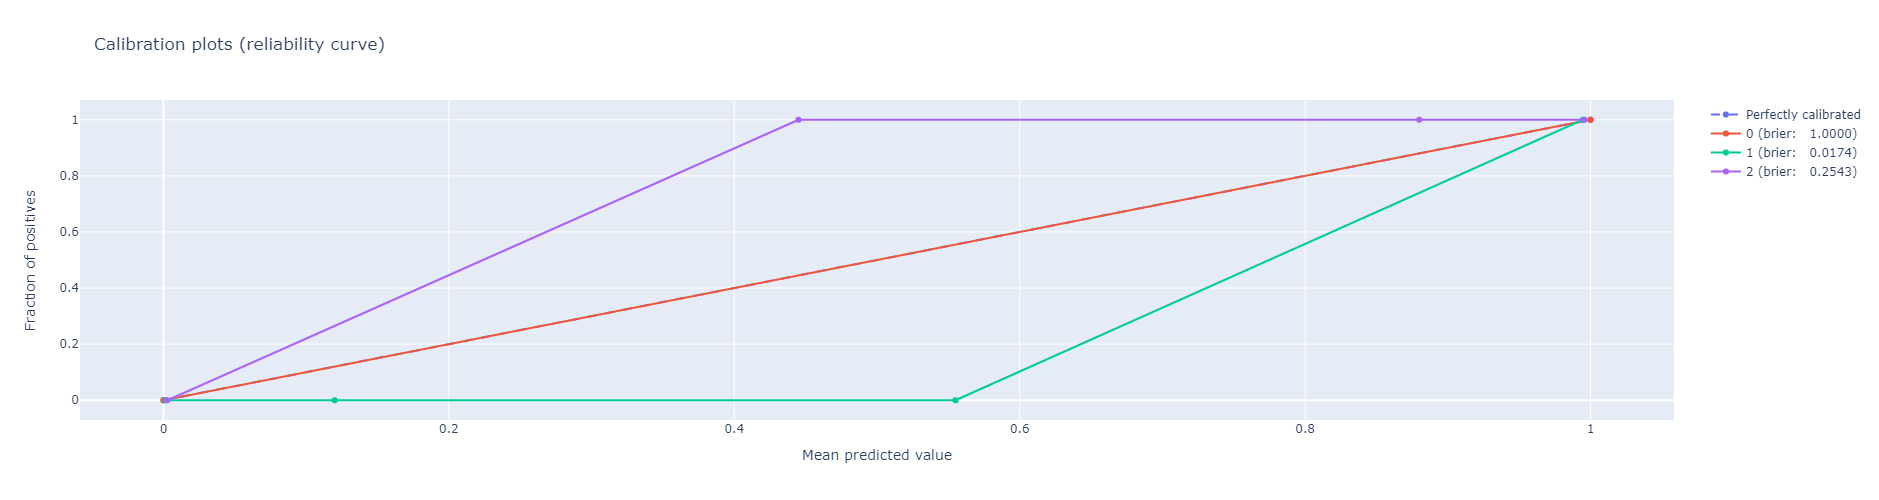

The Brier score metric may be used to assess how well a classifier is calibrated. For more info, please visit https://en.wikipedia.org/wiki/Brier_score

Go to top

Unused Features

Detect features that are nearly unused by the model.

Features above the line are a sample of the most important features, while the features below the line are the unused features with highest variance, as defined by check parameters

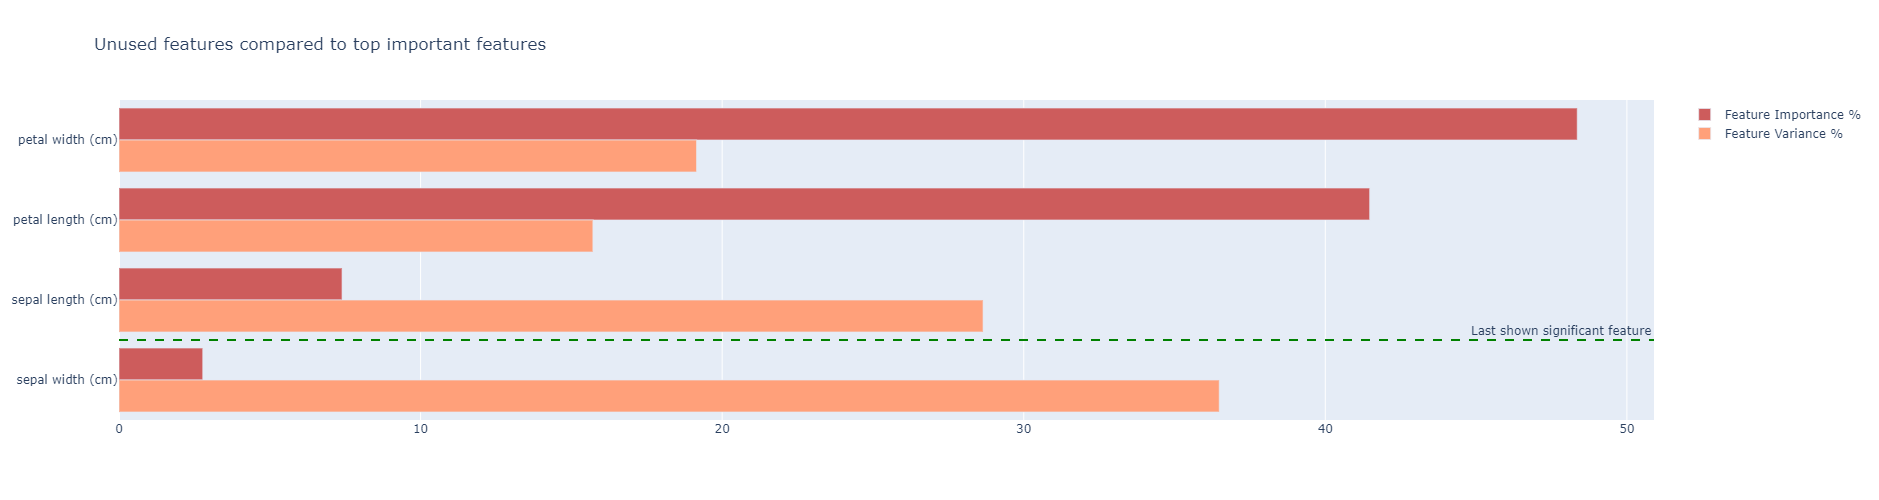

Go to top

Model Inference Time Check - Train Dataset

Measure model average inference time (in seconds) per sample.

Average model inference time for one sample (in seconds): 7.548e-05

Go to top

Model Inference Time Check - Test Dataset

Measure model average inference time (in seconds) per sample.

Average model inference time for one sample (in seconds): 0.00021498

Go to top

Train Test Drift

Calculate drift between train dataset and test dataset per feature, using statistical measures.

The Drift score is a measure for the difference between two distributions, in this check - the test
 and train distributions. The check shows the drift score and distributions for the features, sorted by
 feature importance and showing only the top 5 features, according to feature importance.
 If available, the plot titles also show the feature importance (FI) rank.

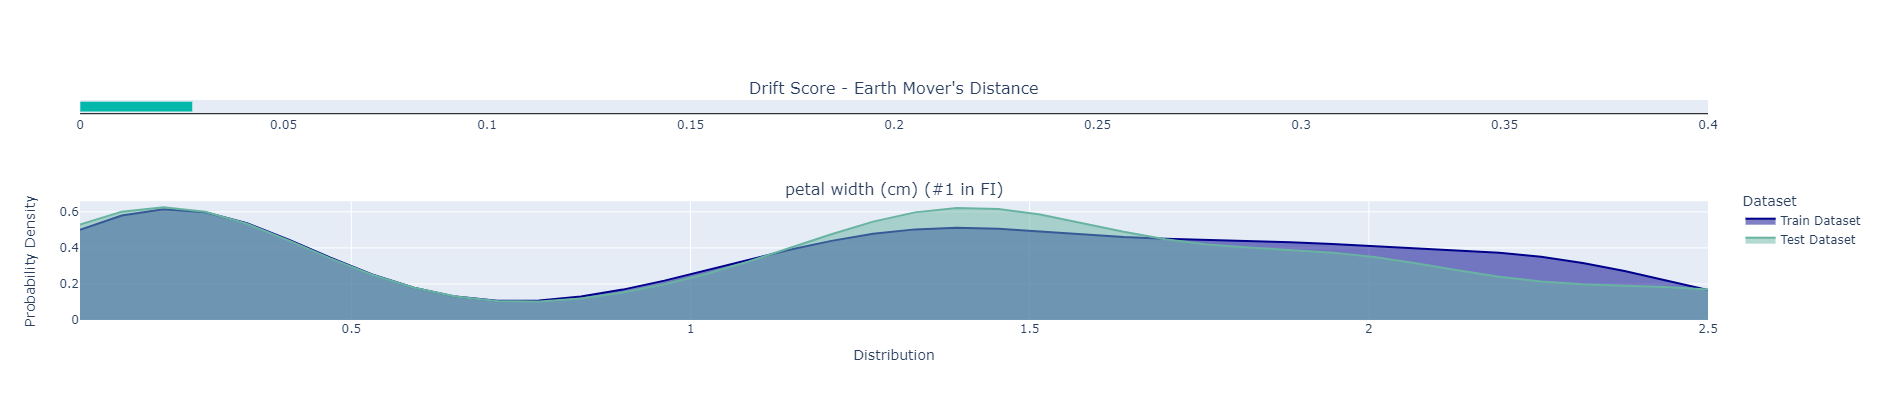

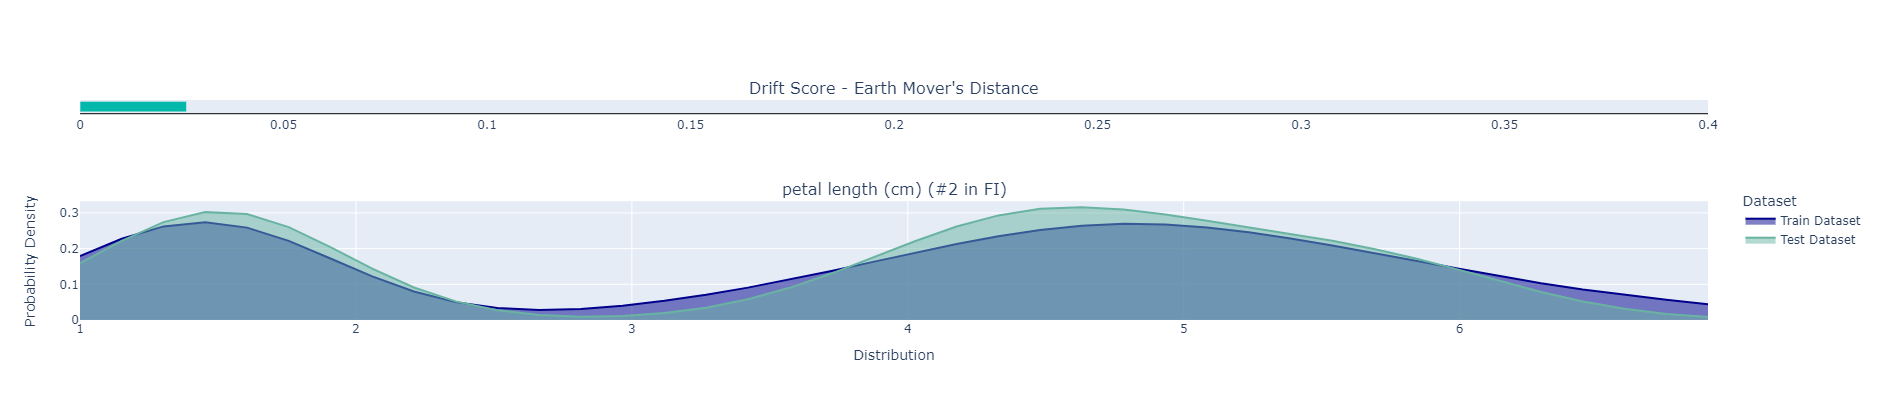

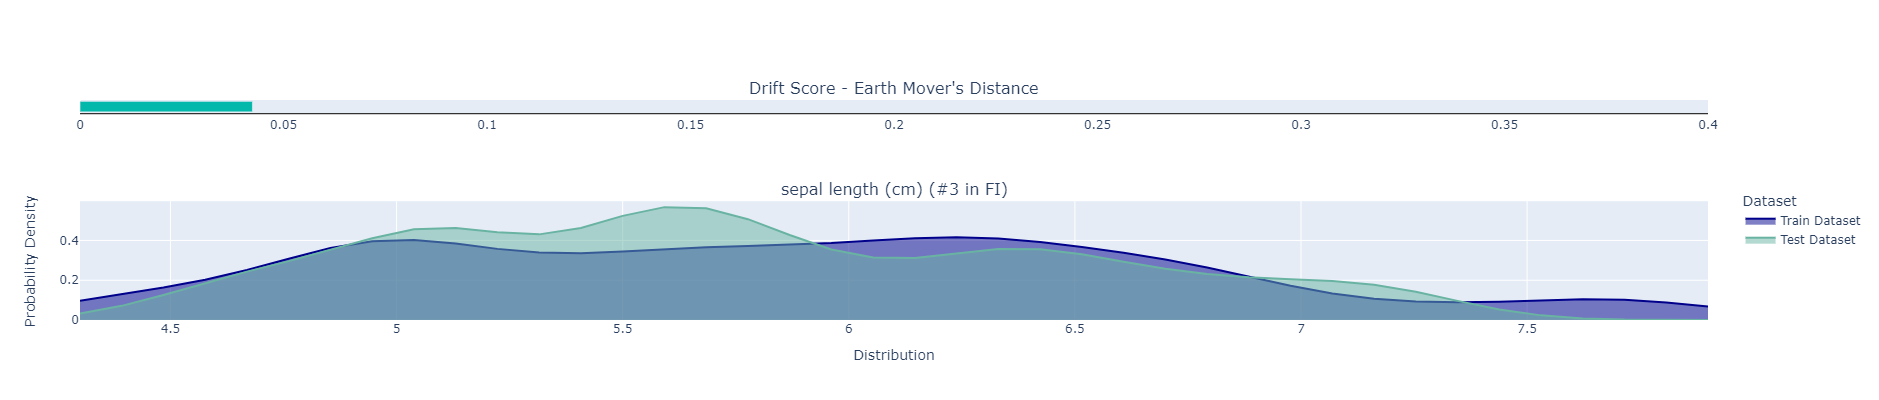

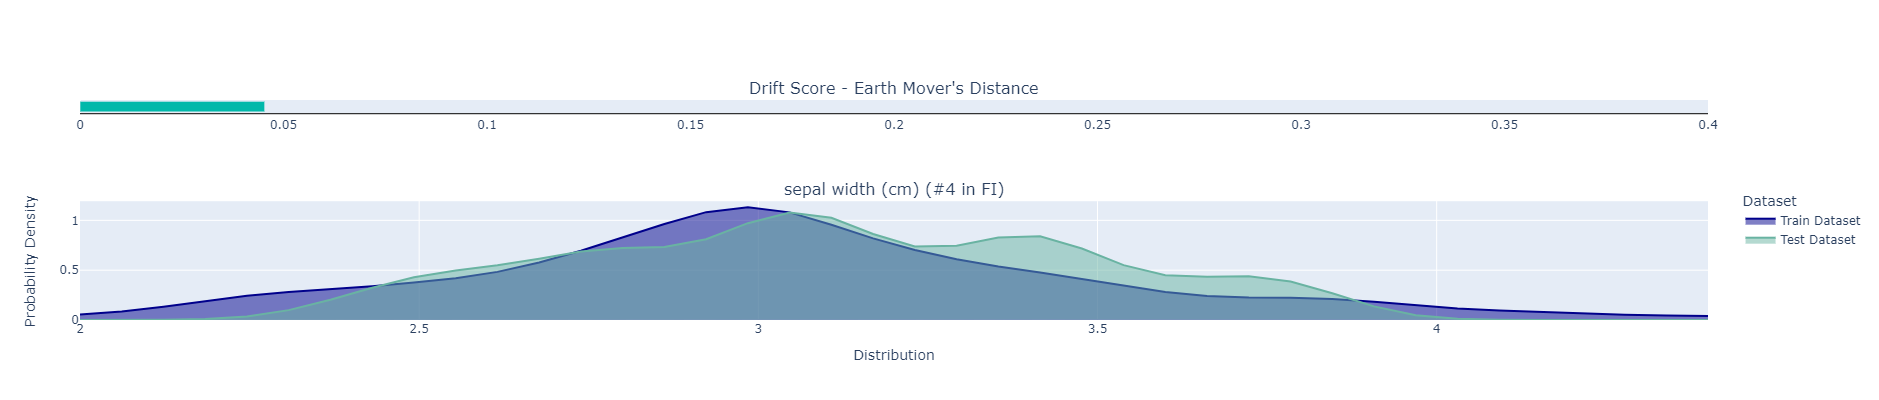

Go to top

Train Test Label Drift

Calculate label drift between train dataset and test dataset, using statistical measures.

The Drift score is a measure for the difference between two distributions, in this check - the test
 and train distributions. The check shows the drift score and distributions for the label.

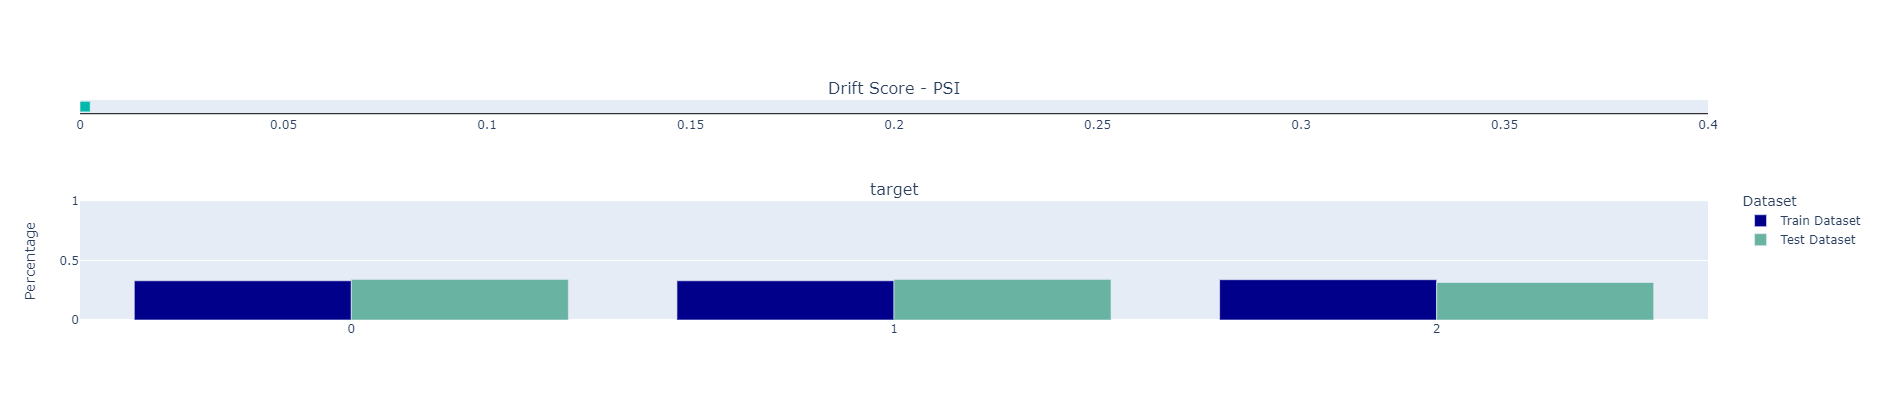

Go to top

Whole Dataset Drift

Calculate drift between the entire train and test datasets using a model trained to distinguish between them.

The shown features are the features that are most important for the domain classifier - the
 domain_classifier trained to distinguish between the train and test datasets. The percents of
 explained dataset difference are the calculated feature importance values for the feature.

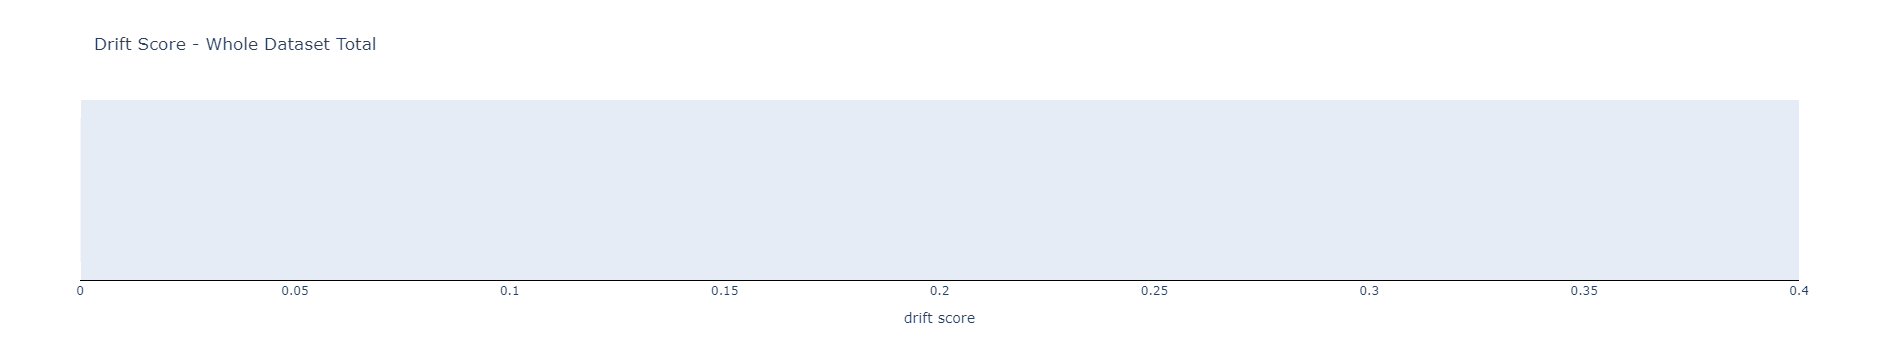

Main features contributing to drift

* showing only the top 3 columns, you can change it using n_top_columns param

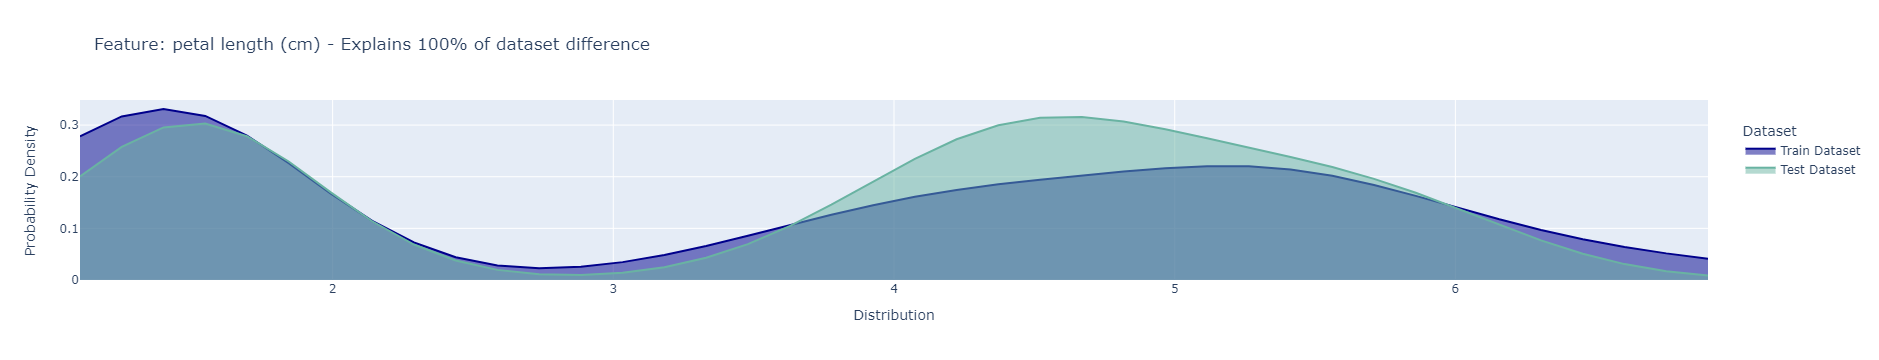

Go to top

Datasets Size Comparison

Verify test dataset size comparing it to the train dataset size.

Train 
 Test 
 
 
 
 
 Size 
 112 
 38

Go to top

Train Test Samples Mix

Detect samples in the test data that appear also in training data.

2.63% (1.0 / 38) of test data samples appear in train data

sepal length (cm) 
 sepal width (cm) 
 petal length (cm) 
 petal width (cm) 
 target 
 
 
 
 
 Test indices: 142 
 5.80 
 2.70 
 5.10 
 1.90 
 2 
 
 
 Train indices: 101 
 5.80 
 2.70 
 5.10 
 1.90 
 2

Go to top

Other Checks That Weren't Displayed 
 
 
 
 
 Check 
 Reason 
 
 
 
 
 Trust Score Comparison 
 DeepchecksValueError: Number of samples in test dataset have not passed the minimum. you can change minimum samples needed to run with parameter "min_test_samples" 
 
 
 Regression Systematic Error 
 DeepchecksValueError: Expected model to be a type from ['regression'], but received model of type: multiclass 
 
 
 Regression Systematic Error 
 DeepchecksValueError: Expected model to be a type from ['regression'], but received model of type: multiclass 
 
 
 Regression Error Distribution 
 DeepchecksValueError: Expected model to be a type from ['regression'], but received model of type: multiclass 
 
 
 Regression Error Distribution 
 DeepchecksValueError: Expected model to be a type from ['regression'], but received model of type: multiclass 
 
 
 Boosting Overfit 
 DeepchecksValueError: Unsupported model of type: RandomForestClassifier 
 
 
 Index Train Test Leakage 
 DeepchecksValueError: Check requires dataset to have an index column 
 
 
 Date Train Test Leakage Duplicates 
 DeepchecksValueError: Check requires dataset to have a datetime column 
 
 
 Date Train Test Leakage Overlap 
 DeepchecksValueError: Check requires dataset to have a datetime column 
 
 
 Identifier Leakage 
 DeepchecksValueError: Dataset needs to have a date or index column. 
 
 
 Identifier Leakage 
 DeepchecksValueError: Dataset needs to have a date or index column. 
 
 
 String Mismatch - Test Dataset 
 Nothing found 
 
 
 Data Duplicates - Train Dataset 
 Nothing found 
 
 
 Data Duplicates - Test Dataset 
 Nothing found 
 
 
 String Length Out Of Bounds - Train Dataset 
 Nothing found 
 
 
 String Length Out Of Bounds - Test Dataset 
 Nothing found 
 
 
 Special Characters - Train Dataset 
 Nothing found 
 
 
 Special Characters - Test Dataset 
 Nothing found 
 
 
 String Mismatch - Train Dataset 
 Nothing found 
 
 
 Mixed Data Types - Test Dataset 
 Nothing found 
 
 
 Single Value in Column - Train Dataset 
 Nothing found 
 
 
 Mixed Nulls - Test Dataset 
 Nothing found 
 
 
 Mixed Nulls - Train Dataset 
 Nothing found 
 
 
 Single Value in Column - Test Dataset 
 Nothing found 
 
 
 Label Ambiguity - Train Dataset 
 Nothing found 
 
 
 String Mismatch Comparison 
 Nothing found 
 
 
 New Label Train Test 
 Nothing found 
 
 
 Category Mismatch Train Test 
 Nothing found 
 
 
 Dominant Frequency Change 
 Nothing found 
 
 
 Mixed Data Types - Train Dataset 
 Nothing found 
 
 
 Label Ambiguity - Test Dataset 
 Nothing found

Go to top

In [4]:
# note that we set check_datasets_policy to 'both' so that for single dataset checks (e.g. some of the integrity checks),
# both the test and the train data will be checked.

suite.run(train_dataset=ds_train, test_dataset=ds_test, model=rf_clf)

### Inspect suite and remove a condition

We can see that the single feature contribution failed, both for test and for train. Since this is a very simple dataset with few features and this behavior is not necessarily problematic, we will remove the existing conditions for the PPS

In [5]:
# Lets first print the suite to find the conditions that we want to change:
suite

Full Suite: [
	0: ModelInfo
	1: ColumnsInfo
	2: ConfusionMatrixReport
	3: PerformanceReport
		Conditions:
			0: Train-Test scores relative degradation is not greater than 0.1
	4: RocReport(excluded_classes=[])
		Conditions:
			0: Not less than 0.7 AUC score for all the classes
	5: SimpleModelComparison
		Conditions:
			0: $$\frac{\text{model score}}{\text{simple model score}} >= 1.1$$
	6: ModelErrorAnalysis
		Conditions:
			0: The performance of the detected segments must not differ by more than 5.00%
	7: CalibrationScore
	8: TrustScoreComparison
		Conditions:
			0: Mean trust score decline is not greater than 20.00%
	9: RegressionSystematicError
		Conditions:
			0: Bias ratio is not greater than 0.01
	10: RegressionErrorDistribution
		Conditions:
			0: Kurtosis value not less than -0.1
	11: BoostingOverfit
		Conditions:
			0: Test score over iterations doesn't decline by more than 5.00% from the best score
	12: UnusedFeatures
		Conditions:
			0: Number of high variance unused features

In [6]:
# now we can use the check's index and the condition's number to remove it:
print(suite[6])
suite[6].remove_condition(0)

ModelErrorAnalysis
	Conditions:
		0: The performance of the detected segments must not differ by more than 5.00%


In [7]:
# print and see that the condition was removed
suite[6]

ModelErrorAnalysis

If we now re-run the suite, all of the existing conditions will pass.

*Note: the check we manipulated will still run as part of the Suite, however it won't appear in the Conditions Summary since it no longer has any conditions defined on it. You can still see its display results in the Additional Outputs section*

**For more info about working with conditions, see the detailed configuring conditions guide.**